In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np


In [2]:
df=pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
               parse_dates=['Date'],
               index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
len(df)

2787

In [5]:
# only want closing price for each day
bitcoin_prices=pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':'Price'})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


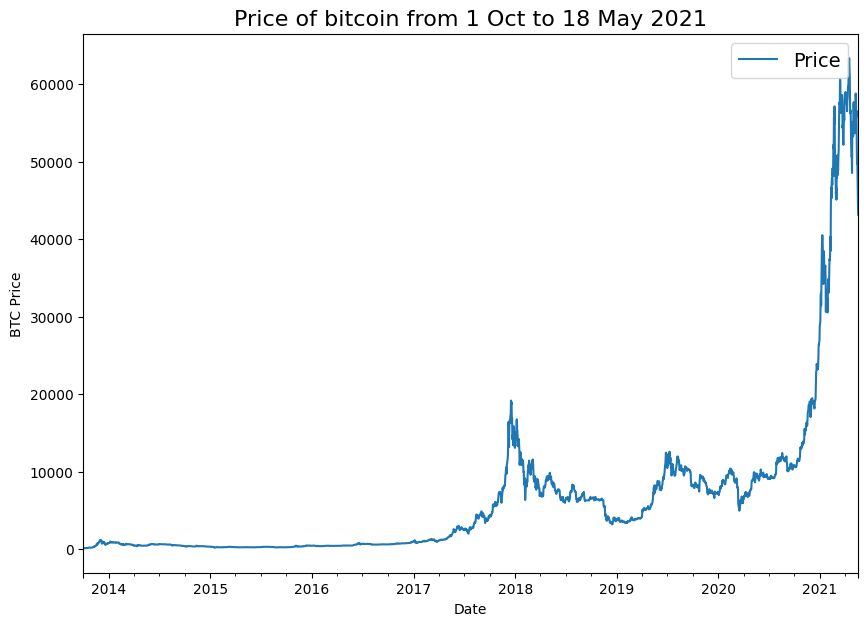

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('BTC Price')
plt.title("Price of bitcoin from 1 Oct to 18 May 2021",fontsize=16)
plt.legend(fontsize=14);

In [7]:
import csv
from datetime import datetime 


timesteps=[]
btc_price=[]
with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv','r') as f:
    csv_reader=csv.reader(f,delimiter=",")
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
        btc_price.append(float(line[2]))
        
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

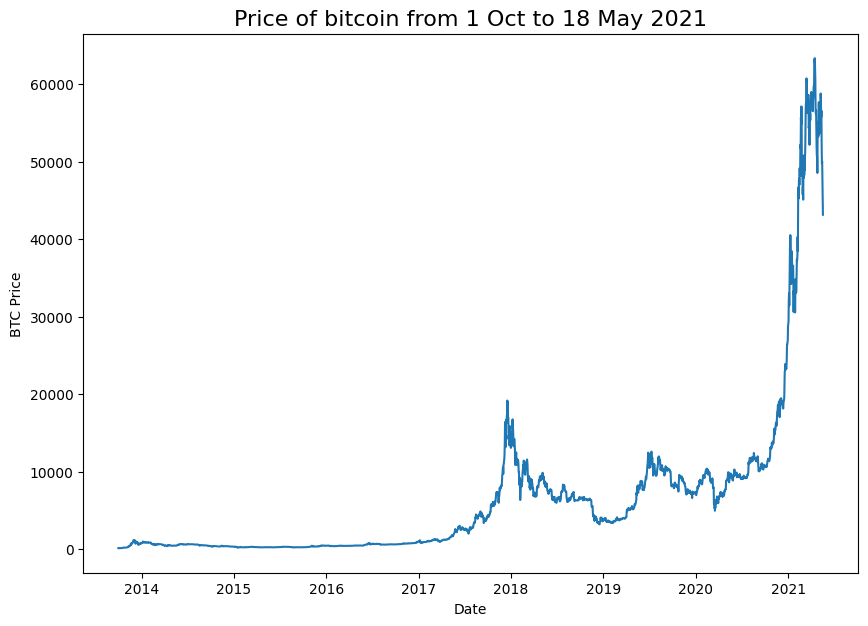

In [8]:
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel('BTC Price')
plt.title("Price of bitcoin from 1 Oct to 18 May 2021",fontsize=16)
plt.xlabel('Date')

In [9]:
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

# wrong way to make train/test split

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(timesteps,prices,test_size=0.2,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

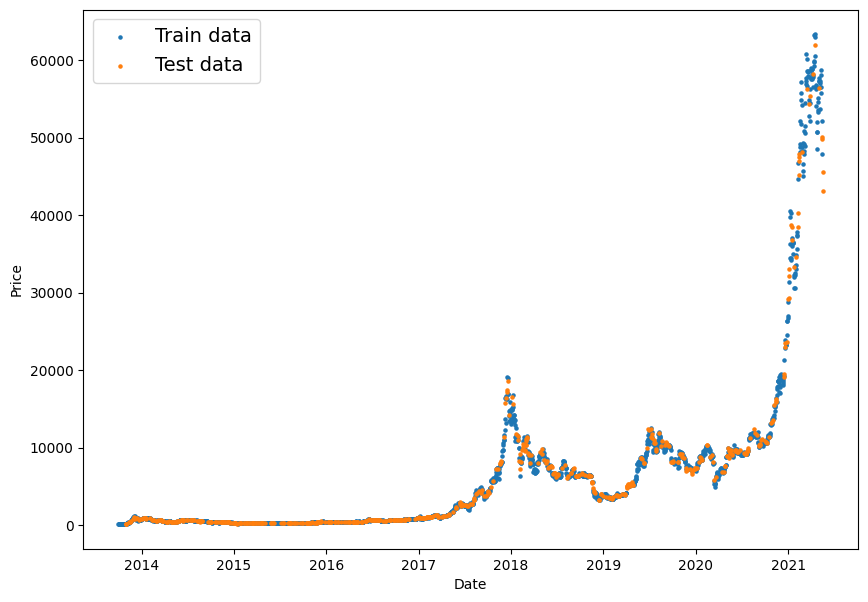

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,s=5,label="Train data")
plt.scatter(x_test,y_test,s=5,label="Test data")
plt.xlabel('Date')
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.show();

# right way

In [12]:
split_size=int(0.8*len(timesteps))

x_train,y_train=timesteps[:split_size],prices[:split_size]
x_test,y_test=timesteps[split_size:],prices[split_size:]

len(x_train),len(x_test),len(y_train),len(y_test)

(2229, 558, 2229, 558)

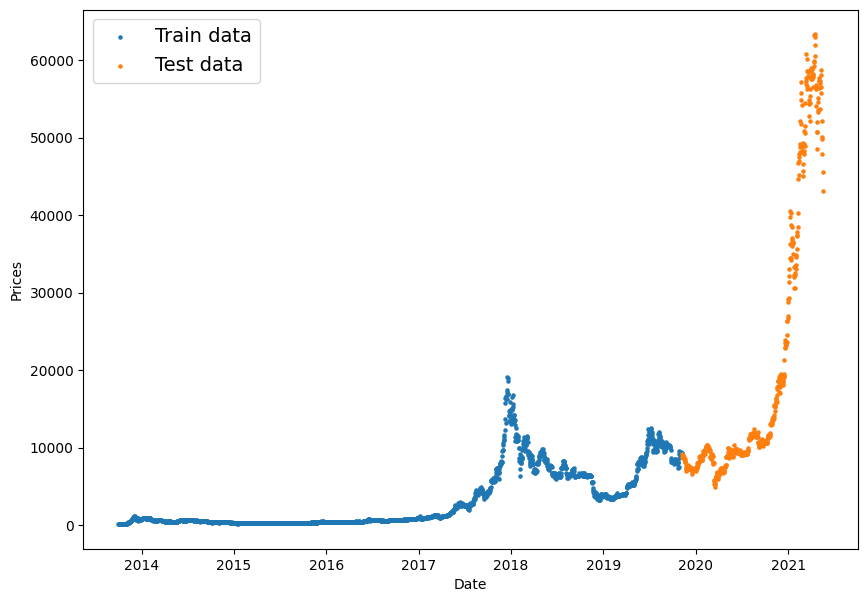

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,s=5,label='Train data')
plt.scatter(x_test,y_test,s=5,label='Test data')
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend(fontsize=14);

In [14]:
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
    
    plt.plot(timesteps[start:end],values[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

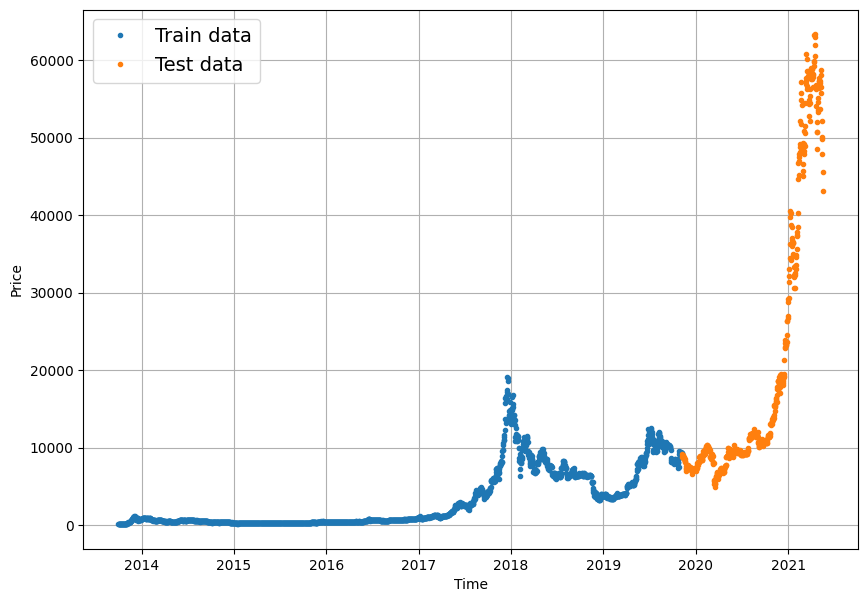

In [15]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train,values=y_train,label="Train data")
plot_time_series(x_test,y_test,label="Test data")

# naive forecast formula
`ŷ=y-1`

In [16]:
naive_forcast=y_test[:-1]
naive_forcast[:10],naive_forcast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [17]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

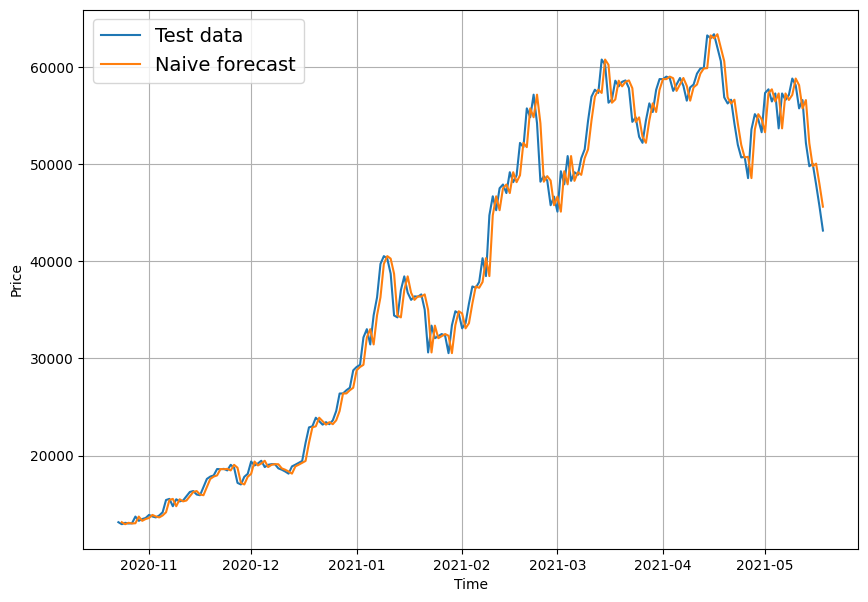

In [18]:
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=x_train,values=y_train,label="Train data")
plot_time_series(x_test,y_test,start=350,label="Test data",format='-')
plot_time_series(x_test[1:],naive_forcast,start=350,format="-",label='Naive forecast')

In [19]:
def mean_absolute_scaled_error(y_true,y_pred):
    
    mae=tf.reduce_mean(abs(y_true-y_pred))
    mae_naive_no_season=tf.reduce_mean(tf.abs(tf.abs(y_true[1:]-y_true[:-1])))
    
    return mae/mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_test[1:],naive_forcast).numpy()

0.9995699939182624

In [21]:
def evaluate_preds(y_true,y_pred):
    y_true=tf.cast(y_true,dtype="float32")
    y_pred=tf.cast(y_pred,dtype=tf.float32)
    
    mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse=tf.sqrt(mse)
    mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase=mean_absolute_scaled_error(y_true,y_pred)
    
    if mae.ndim>0:
        mae=tf.reduce_mean(mae)
        mse=tf.reduce_mean(mse)
        rmse=tf.reduce_mean(rmse)
        mape=tf.reduce_mean(mape)
        mase=tf.reduce_mean(mase)
    
    return {"mse":mse.numpy(),
            "mae":mae.numpy(),
            "rmse":rmse.numpy(),
            "mape":mape.numpy(),
            "mase":mase.numpy()}

In [22]:
naive_results=evaluate_preds(y_test[1:],naive_forcast)
naive_results

{'mse': 1147547.0,
 'mae': 567.9802,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [23]:
naive_forcast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [24]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [25]:
tf.reduce_max(y_test),tf.reduce_min(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>)

In [26]:
len(y_train)

2229

In [27]:
print(f"We want to use: {btc_price[:7]} to predict: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict: 123.033


In [28]:
HORIZON=1 # PREDICT NEXT 1 DAY
WINDOW_SIZE=7 # USE THE PAST 7 DAYS TO PREDICT

In [29]:
def get_labelled_window(x,horizon=HORIZON):
    return x[:,:-horizon],x[:,-horizon:]

In [30]:
test_window,test_label=get_labelled_window(tf.expand_dims(tf.range(8),axis=0))
test_window,test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]])>)

In [31]:
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


In [32]:
import numpy as np

def make_windows(x,window_size=WINDOW_SIZE,horizon=HORIZON):
    window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
    window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    
    window_array=x[window_indexes]
    windows,labels=get_labelled_window(window_array,horizon=horizon)
    return windows,labels

In [33]:
full_windows,full_labels=make_windows(prices)
len(full_windows),len(full_labels)

(2780, 2780)

In [34]:
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [35]:
def make_train_test_splits(windows,labels,test_split=0.2):
    
    split_size=int(len(windows)*(1-test_split))
    train_windows=windows[:split_size]
    train_labels=labels[:split_size]
    test_windows=windows[split_size:]
    test_labels=labels[split_size:]
    
    return train_windows,test_windows,train_labels,test_labels

In [36]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [37]:
train_windows[:5],train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [38]:
test_windows[:5],test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [39]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

True

In [40]:
import os

def create_model_checkpoint(model_name,save_path='model_experiment_for_time_series_forecast'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                              verbose=0,
                                              save_best_only=True)

In [41]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON,activation="linear")
],name="model_1_dense")

model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae',"mse"])

model_1.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 2s 63ms/step - loss: 1489.0592 - mae: 1489.0592 - mse: 7295356.5000 - val_loss: 1438.3392 - val_mae: 1438.3392 - val_mse: 6041280.5000
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 333.9752 - mae: 333.9752 - mse: 442816.3125 - val_loss: 1731.7972 - val_mae: 1731.7972 - val_mse: 7080745.5000
Epoch 3/100
18/18 [==============================] - 1s 38ms/step - loss: 213.4100 - mae: 213.4100 - mse: 223802.4844 - val_loss: 1146.9114 - val_mae: 1146.9114 - val_mse: 3722324.2500
Epoch 4/100
18/18 [==============================] - 1s 38ms/step - loss: 182.3439 - mae: 182.3439 - mse: 170875.6875 - val_loss: 997.3675 - val_mae: 997.3675 - val_mse: 3191088.7500
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 175.9631 - mae: 175.9631 - mse: 168374.5625 - val_loss: 1001.5103 - val_mae: 1001.5103 - val_mse: 3151763.7500
Epoch 6/100
18/18 [==============================] - 1s 38ms/step - loss: 17

18/18 [==============================] - 0s 6ms/step - loss: 131.0111 - mae: 131.0111 - mse: 93697.3828 - val_loss: 723.6663 - val_mae: 723.6663 - val_mse: 1754155.7500
Epoch 27/100
18/18 [==============================] - 0s 26ms/step - loss: 128.6408 - mae: 128.6408 - mse: 94202.2812 - val_loss: 673.9949 - val_mae: 673.9949 - val_mse: 1556228.8750
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 124.9764 - mae: 124.9764 - mse: 89596.0938 - val_loss: 678.6534 - val_mae: 678.6534 - val_mse: 1521485.0000
Epoch 29/100
18/18 [==============================] - 0s 26ms/step - loss: 131.9905 - mae: 131.9905 - mse: 95488.7891 - val_loss: 672.3213 - val_mae: 672.3213 - val_mse: 1500858.7500
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 127.3130 - mae: 127.3130 - mse: 90601.8359 - val_loss: 775.2321 - val_mae: 775.2321 - val_mse: 1767536.6250
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 133.7450 - mae: 133.7450 - 

Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 124.7103 - mae: 124.7103 - mse: 85140.3672 - val_loss: 672.8821 - val_mae: 672.8821 - val_mse: 1459709.5000
Epoch 58/100
18/18 [==============================] - 1s 39ms/step - loss: 115.9743 - mae: 115.9743 - mse: 76349.4688 - val_loss: 592.3336 - val_mae: 592.3336 - val_mse: 1248776.1250
Epoch 59/100
18/18 [==============================] - 1s 48ms/step - loss: 111.8676 - mae: 111.8676 - mse: 75423.2031 - val_loss: 588.1349 - val_mae: 588.1349 - val_mse: 1236485.0000
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 109.7013 - mae: 109.7013 - mse: 74486.4688 - val_loss: 621.5146 - val_mae: 621.5146 - val_mse: 1290185.8750
Epoch 61/100
18/18 [==============================] - 1s 38ms/step - loss: 111.8458 - mae: 111.8458 - mse: 76206.2812 - val_loss: 585.1240 - val_mae: 585.1240 - val_mse: 1221563.8750
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 110.7118 - ma

18/18 [==============================] - 0s 8ms/step - loss: 106.9644 - mae: 106.9644 - mse: 68657.8359 - val_loss: 600.2412 - val_mae: 600.2412 - val_mse: 1225879.1250
Epoch 91/100
18/18 [==============================] - 0s 8ms/step - loss: 113.7354 - mae: 113.7354 - mse: 74172.2266 - val_loss: 639.3603 - val_mae: 639.3603 - val_mse: 1327529.8750
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 108.7175 - mae: 108.7175 - mse: 72094.6641 - val_loss: 572.4085 - val_mae: 572.4085 - val_mse: 1179779.1250
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 113.4873 - mae: 113.4873 - mse: 73975.2812 - val_loss: 625.3431 - val_mae: 625.3431 - val_mse: 1293921.8750
Epoch 94/100
18/18 [==============================] - 0s 8ms/step - loss: 110.9697 - mae: 110.9697 - mse: 73616.4688 - val_loss: 576.5048 - val_mae: 576.5048 - val_mse: 1179001.8750
Epoch 95/100
18/18 [==============================] - 1s 39ms/step - loss: 106.7381 - mae: 106.7381 - m

In [42]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 650.8334 - mae: 650.8334 - mse: 1336482.3750


[650.8334350585938, 650.8334350585938, 1336482.375]

In [43]:
# laod the saved best model_1 and evaluate it
model_1=tf.keras.models.load_model("model_experiment_for_time_series_forecast/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 566.2528 - mae: 566.2528 - mse: 1161420.3750


[566.2528076171875, 566.2528076171875, 1161420.375]

In [44]:
def make_preds(model,input_data):
    forecast=model.predict(input_data)
    return tf.squeeze(forecast)

In [45]:
model_1_preds=make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8869.837, 8774.576, 9019.529, 8773.856, 8746.862, 8753.303,
        8683.513, 8506.664, 8478.337, 8519.693], dtype=float32)>)

In [46]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [47]:
model_1_results=evaluate_preds(tf.squeeze(test_labels),model_1_preds)
model_1_results

{'mse': 1161420.4,
 'mae': 566.25275,
 'rmse': 1077.6921,
 'mape': 2.5309575,
 'mase': 0.99474925}

In [48]:
naive_results

{'mse': 1147547.0,
 'mae': 567.9802,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

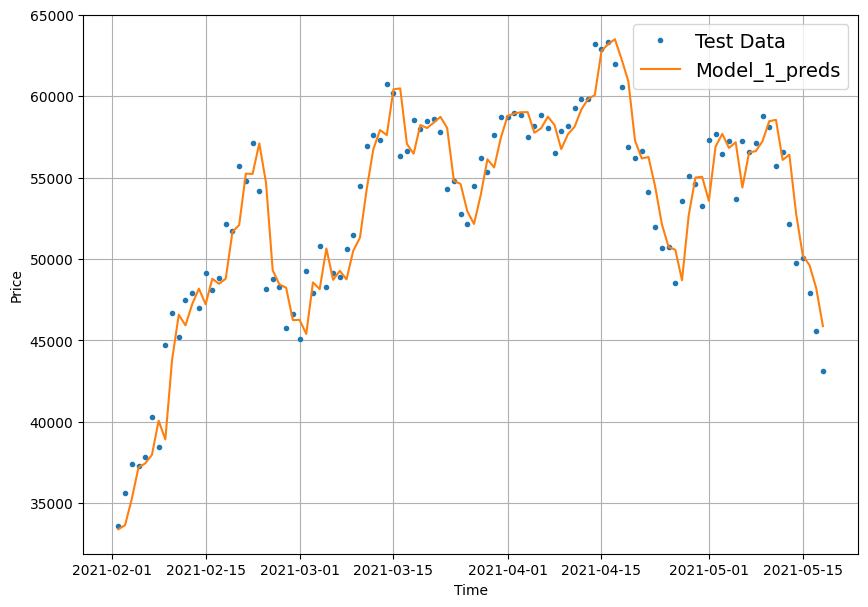

In [49]:
offset=450
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,label="Test Data")


plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label='Model_1_preds'
                 )

# model 2 

In [50]:
HORIZON=1
WINDOW_sIZE=30

In [51]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_sIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2757, 2757)

In [52]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2205, 552, 2205, 552)

In [53]:
train_windows[:3],train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [54]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON,activation='linear')
],name='model_2_dense')

model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,train_labels,
            epochs=100,batch_size=128,
            verbose=0,validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_2_dense\assets
INFO:tensorflow:Asse

In [55]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 625.7114


625.71142578125

In [56]:
model_2=tf.keras.models.load_model('model_experiment_for_time_series_forecast/model_2_dense/')
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 625.7114


625.71142578125

In [57]:
model_2_preds=make_preds(model_2,input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [58]:
model_2_results=evaluate_preds(tf.squeeze(test_labels),
                               model_2_preds)
model_2_results

{'mse': 1359804.4,
 'mae': 625.71136,
 'rmse': 1166.1064,
 'mape': 2.8157897,
 'mase': 1.0937496}

In [59]:
model_1_results

{'mse': 1161420.4,
 'mae': 566.25275,
 'rmse': 1077.6921,
 'mape': 2.5309575,
 'mase': 0.99474925}

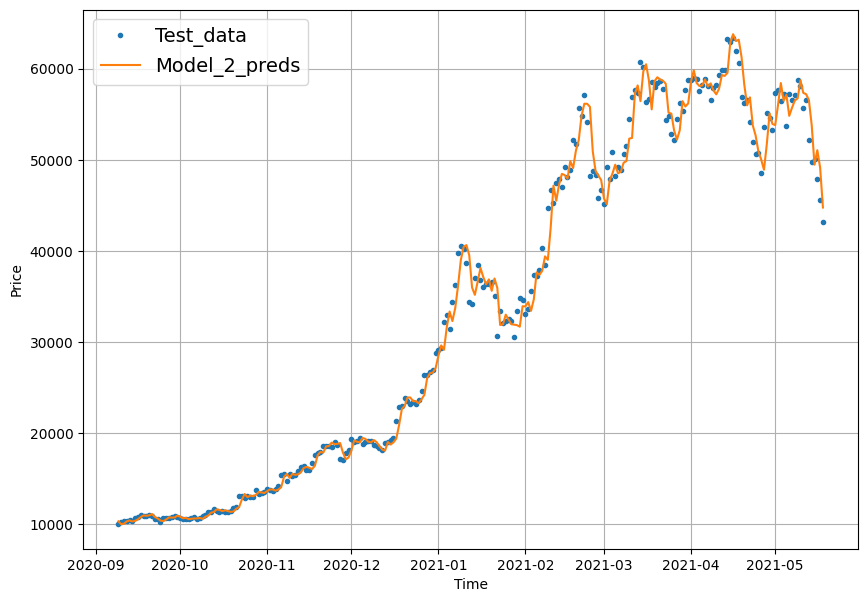

In [60]:
offset=300
plt.figure(figsize=(10,7))

plot_time_series(timesteps=x_test[-len(test_windows):],values=test_labels[:,0],start=offset,label='Test_data')
plot_time_series(timesteps=x_test[-len(test_windows):],values=model_2_preds,start= offset,format="-",label='Model_2_preds')

# Model 3

In [61]:
HORIZON=7
WINDOW_SIZE=30

In [62]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2751, 2751)

In [63]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2200, 551, 2200, 551)

In [64]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON)
],name="model_3_dense")

model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,train_labels,
            epochs=100,verbose=0,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_3_dense\assets
INFO:tensorflow:Asse

In [65]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1392.6490


1392.6490478515625

In [66]:
model_3=tf.keras.models.load_model('model_experiment_for_time_series_forecast/model_3_dense/')
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1244.6715


1244.6715087890625

In [67]:
model_3_preds=make_preds(model_3,
                         input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9149.113 , 9496.589 , 9363.842 , 9474.886 , 9471.8955, 9310.081 ,
        9608.627 ],
       [9004.492 , 9069.146 , 8973.984 , 9265.128 , 9120.12  , 9217.403 ,
        9503.096 ],
       [8741.256 , 8913.681 , 8654.4795, 9105.282 , 8951.487 , 9064.269 ,
        9227.637 ],
       [8885.272 , 9031.168 , 8851.567 , 9368.546 , 9197.238 , 9184.597 ,
        9254.394 ],
       [8802.17  , 8928.85  , 8966.744 , 9264.386 , 9046.634 , 8972.774 ,
        9051.669 ]], dtype=float32)>

In [68]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8854.936, 8788.443, 8629.753, 8622.638, 8524.476], dtype=float32)>

In [69]:
model_3_results=evaluate_preds(tf.squeeze(test_labels),model_3_preds)
model_3_results

{'mse': 5483799.0,
 'mae': 1244.6715,
 'rmse': 1431.1742,
 'mape': 5.5663843,
 'mase': 2.2148235}

In [70]:
model_1_results,model_2_results,naive_results

({'mse': 1161420.4,
  'mae': 566.25275,
  'rmse': 1077.6921,
  'mape': 2.5309575,
  'mase': 0.99474925},
 {'mse': 1359804.4,
  'mae': 625.71136,
  'rmse': 1166.1064,
  'mape': 2.8157897,
  'mase': 1.0937496},
 {'mse': 1147547.0,
  'mae': 567.9802,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957})

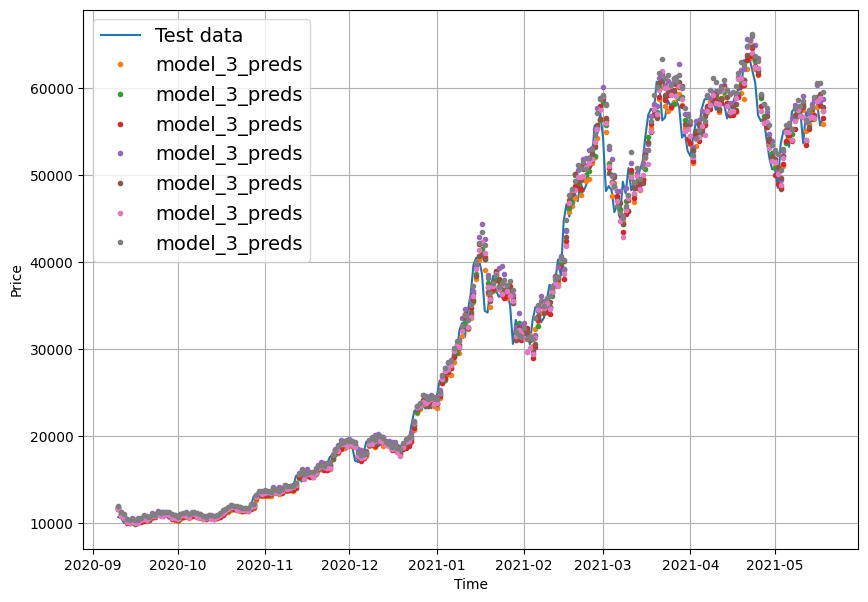

In [71]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):],values=test_labels[:,0],start=offset,format="-",label="Test data")
plot_time_series(timesteps=x_test[-len(test_windows):],values=model_3_preds,start=offset,label='model_3_preds')

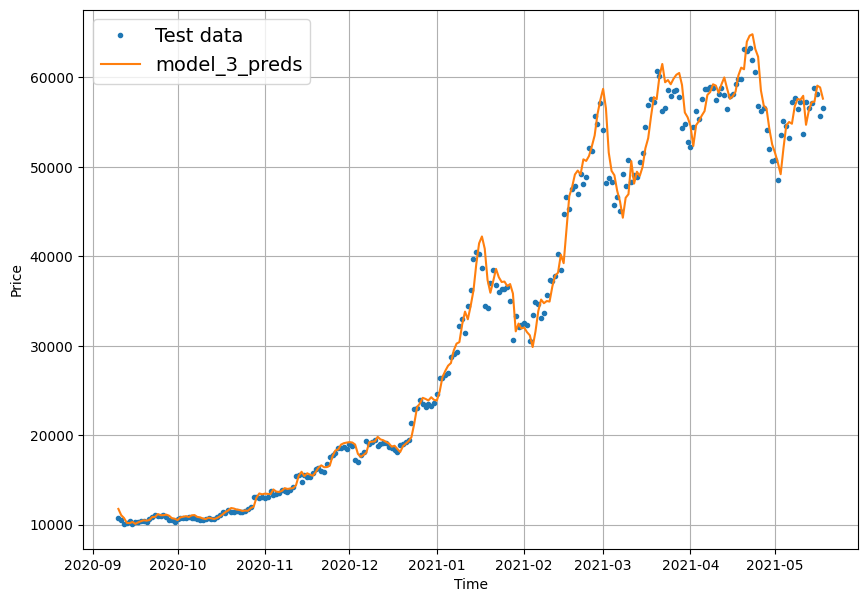

In [72]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test data")
plot_time_series(timesteps=x_test[-len(test_windows):],values=tf.reduce_mean(model_3_preds,axis=1),format="-",start=offset,label='model_3_preds')

<Axes: >

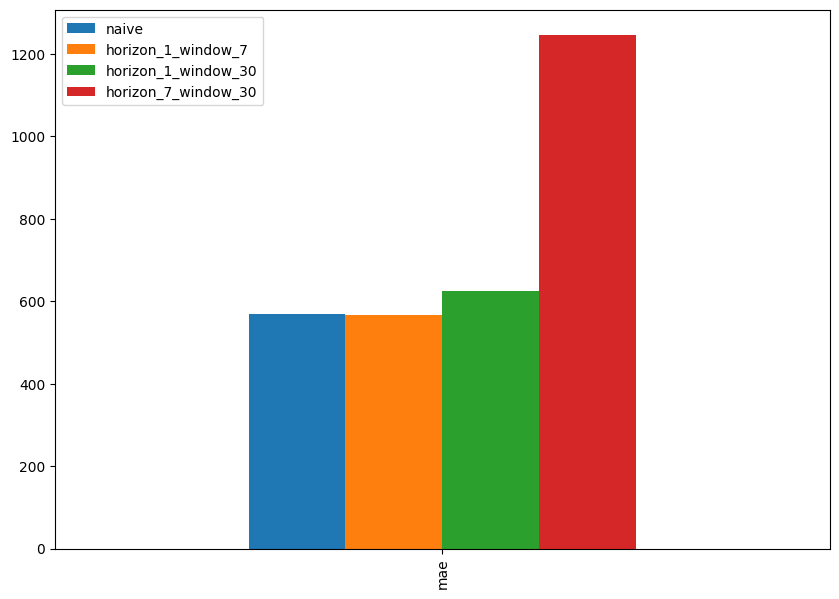

In [73]:
pd.DataFrame({"naive":naive_results["mae"],
              "horizon_1_window_7":model_1_results["mae"],
              "horizon_1_window_30":model_2_results["mae"],
              "horizon_7_window_30":model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7),kind="bar")

# model 4

In [74]:
HORIZON=1
WINDOW_SIZE=7

In [75]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [76]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [77]:
train_windows[0].shape

(7,)

In [78]:
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [79]:
expand_dim_layer=layers.Lambda(lambda x:tf.expand_dims(x,axis=1))

In [80]:
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dim_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dim_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [81]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=128,kernel_size=5,strides=1,padding='causal',activation='relu'),
    layers.Dense(HORIZON)
],name="model_4_dense")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_4_dense\assets


In [82]:
model_4.summary()

Model: "model_4_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 7ms/step - loss: 640.5581


640.55810546875

In [84]:
model_4=tf.keras.models.load_model('model_experiment_for_time_series_forecast/model_4_dense/')
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 579.1258


579.1257934570312

In [85]:
model_4_preds=make_preds(model_4,test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8932.439, 8790.688, 8980.897, 8835.883, 8745.367, 8732.828,
       8703.54 , 8556.972, 8465.425, 8519.843], dtype=float32)>

In [86]:
model_4_results=evaluate_preds(tf.squeeze(test_labels),
                               model_4_preds)
model_4_results

{'mse': 1220483.0,
 'mae': 579.1258,
 'rmse': 1104.7548,
 'mape': 2.6037152,
 'mase': 1.0173637}

In [87]:
model_1_results

{'mse': 1161420.4,
 'mae': 566.25275,
 'rmse': 1077.6921,
 'mape': 2.5309575,
 'mase': 0.99474925}

# model 5: rnn(lstm)

In [88]:
tf.random.set_seed(42)

inputs=layers.Input(shape=(WINDOW_SIZE))
x=layers.Lambda(lambda x:tf.expand_dims(x,axis=1))(inputs)
#x=layers.LSTM(128,return_sequences=True)(x)
x=layers.LSTM(128,activation='relu')(x)
outputs=layers.Dense(HORIZON)(x)
model_5=tf.keras.Model(inputs,outputs,name='model_5_lstm')

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,train_labels,
            batch_size=128,epochs=100,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2929.9727INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 4s 141ms/step - loss: 2698.6401 - val_loss: 11786.0166
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 1351.0144INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 87ms/step - loss: 1251.8007 - val_loss: 3114.0754
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 291.2059INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 88ms/step - loss: 286.1354 - val_loss: 1071.4934
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 205.2732INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 101ms/step - loss: 198.1069 - val_loss: 1016.9129
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 186.9528 - val_loss: 1088.5952
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 181.5370INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 87ms/step - loss: 181.5370 - val_loss: 1015.7682
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 180.0056 - val_loss: 1026.1578
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 178.5900 - val_loss: 1032.5515
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 176.9672 - val_loss: 1017.3587
Epoch 10/100
 9/18 [==============>...............] - ETA: 0s - loss: 171.1306INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 84ms/step - loss: 175.8529 - val_loss: 995.1226
Epoch 11/100
18/18 [==============================] - 0s 8ms/step - loss: 175.4313 - val_loss: 997.2543
Epoch 12/100
18/18 [==============================] - 0s 8ms/step - loss: 173.6629 - val_loss: 998.1545
Epoch 13/100
10/18 [===============>..............] - ETA: 0s - loss: 166.5669INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 84ms/step - loss: 172.1531 - val_loss: 980.3719
Epoch 14/100
18/18 [==============================] - 0s 9ms/step - loss: 170.5017 - val_loss: 998.9105
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 165.7000INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 99ms/step - loss: 169.8682 - val_loss: 975.4933
Epoch 16/100
15/18 [========================>.....] - ETA: 0s - loss: 167.1421INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 89ms/step - loss: 168.4798 - val_loss: 935.7099
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 166.7475 - val_loss: 1003.5189
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 166.5429 - val_loss: 968.3575
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 163.9404 - val_loss: 969.5326
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 167.6902INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 84ms/step - loss: 163.5279 - val_loss: 906.6287
Epoch 21/100
18/18 [==============================] - 0s 8ms/step - loss: 160.6856 - val_loss: 912.4048
Epoch 22/100
18/18 [==============================] - 0s 8ms/step - loss: 159.3011 - val_loss: 909.9832
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 159.1474 - val_loss: 956.8287
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 157.3342 - val_loss: 922.0118
Epoch 25/100
11/18 [=================>............] - ETA: 0s - loss: 163.2448INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 83ms/step - loss: 155.9097 - val_loss: 862.5312
Epoch 26/100
18/18 [==============================] - 0s 8ms/step - loss: 153.3688 - val_loss: 866.0079
Epoch 27/100
10/18 [===============>..............] - ETA: 0s - loss: 156.7376INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 98ms/step - loss: 151.9984 - val_loss: 860.8896
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 153.4688INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 85ms/step - loss: 150.8469 - val_loss: 842.2709
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 147.4877INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 84ms/step - loss: 148.9161 - val_loss: 840.1065
Epoch 30/100
18/18 [==============================] - 0s 9ms/step - loss: 149.2810 - val_loss: 842.9382
Epoch 31/100
10/18 [===============>..............] - ETA: 0s - loss: 150.7360INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 83ms/step - loss: 145.9767 - val_loss: 822.6252
Epoch 32/100
 9/18 [==============>...............] - ETA: 0s - loss: 142.9382INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 97ms/step - loss: 144.0853 - val_loss: 806.7891
Epoch 33/100
18/18 [==============================] - 0s 10ms/step - loss: 143.9018 - val_loss: 840.8626
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 147.0631INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 86ms/step - loss: 143.2840 - val_loss: 781.4286
Epoch 35/100
18/18 [==============================] - 0s 10ms/step - loss: 140.7508 - val_loss: 801.4129
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 140.5154INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 84ms/step - loss: 141.3601 - val_loss: 773.4406
Epoch 37/100
18/18 [==============================] - 0s 8ms/step - loss: 138.4568 - val_loss: 785.0784
Epoch 38/100
10/18 [===============>..............] - ETA: 0s - loss: 145.2604INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 82ms/step - loss: 136.7173 - val_loss: 753.7084
Epoch 39/100
10/18 [===============>..............] - ETA: 0s - loss: 138.6154INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 96ms/step - loss: 136.5655 - val_loss: 747.2787
Epoch 40/100
18/18 [==============================] - 0s 9ms/step - loss: 135.6643 - val_loss: 755.4822
Epoch 41/100
15/18 [========================>.....] - ETA: 0s - loss: 138.4255INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 84ms/step - loss: 133.4337 - val_loss: 734.7530
Epoch 42/100
18/18 [==============================] - 0s 9ms/step - loss: 132.1359 - val_loss: 742.8251
Epoch 43/100
10/18 [===============>..............] - ETA: 0s - loss: 126.1156INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 83ms/step - loss: 131.1572 - val_loss: 727.9011
Epoch 44/100
18/18 [==============================] - ETA: 0s - loss: 129.9152INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 83ms/step - loss: 129.9152 - val_loss: 718.5911
Epoch 45/100
15/18 [========================>.....] - ETA: 0s - loss: 125.2430INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 99ms/step - loss: 128.9015 - val_loss: 711.3742
Epoch 46/100
18/18 [==============================] - 0s 10ms/step - loss: 128.8125 - val_loss: 720.2688
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 127.6735 - val_loss: 716.6694
Epoch 48/100
10/18 [===============>..............] - ETA: 0s - loss: 124.7815INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 82ms/step - loss: 127.4511 - val_loss: 703.6673
Epoch 49/100
14/18 [======================>.......] - ETA: 0s - loss: 125.8078INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 86ms/step - loss: 125.6420 - val_loss: 700.8093
Epoch 50/100
18/18 [==============================] - 0s 10ms/step - loss: 127.4815 - val_loss: 715.4700
Epoch 51/100
18/18 [==============================] - 0s 9ms/step - loss: 127.0321 - val_loss: 794.3672
Epoch 52/100
11/18 [=================>............] - ETA: 0s - loss: 135.7944INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 83ms/step - loss: 127.6646 - val_loss: 682.6742
Epoch 53/100
18/18 [==============================] - 0s 9ms/step - loss: 123.3754 - val_loss: 695.3434
Epoch 54/100
11/18 [=================>............] - ETA: 0s - loss: 121.4127INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 96ms/step - loss: 122.4058 - val_loss: 679.4408
Epoch 55/100
16/18 [=========================>....] - ETA: 0s - loss: 124.6946INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 85ms/step - loss: 121.7580 - val_loss: 670.7425
Epoch 56/100
16/18 [=========================>....] - ETA: 0s - loss: 123.6737INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 85ms/step - loss: 123.0920 - val_loss: 661.2753
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 125.1891 - val_loss: 699.7228
Epoch 58/100
14/18 [======================>.......] - ETA: 0s - loss: 121.7915INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 85ms/step - loss: 121.8609 - val_loss: 653.4557
Epoch 59/100
10/18 [===============>..............] - ETA: 0s - loss: 116.5589INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 97ms/step - loss: 119.5326 - val_loss: 651.7056
Epoch 60/100
18/18 [==============================] - 0s 10ms/step - loss: 119.6920 - val_loss: 652.5610
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 119.8275 - val_loss: 737.7841
Epoch 62/100
18/18 [==============================] - 0s 9ms/step - loss: 121.1035 - val_loss: 702.8245
Epoch 63/100
18/18 [==============================] - ETA: 0s - loss: 124.5415INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 83ms/step - loss: 124.5415 - val_loss: 648.4858
Epoch 64/100
18/18 [==============================] - 0s 10ms/step - loss: 117.7921 - val_loss: 668.8727
Epoch 65/100
16/18 [=========================>....] - ETA: 0s - loss: 119.1692INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 84ms/step - loss: 119.4811 - val_loss: 637.1053
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 117.6994 - val_loss: 643.6802
Epoch 67/100
12/18 [===================>..........] - ETA: 0s - loss: 114.7442INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 82ms/step - loss: 118.0755 - val_loss: 632.8295
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 117.7186 - val_loss: 634.1304
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 121.9645 - val_loss: 636.2149
Epoch 70/100
12/18 [===================>..........] - ETA: 0s - loss: 113.4821INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 103ms/step - loss: 116.4458 - val_loss: 628.8729
Epoch 71/100
18/18 [==============================] - 0s 9ms/step - loss: 116.3562 - val_loss: 647.2949
Epoch 72/100
18/18 [==============================] - 0s 9ms/step - loss: 119.2654 - val_loss: 629.7180
Epoch 73/100
16/18 [=========================>....] - ETA: 0s - loss: 116.7846INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 89ms/step - loss: 116.3914 - val_loss: 627.4330
Epoch 74/100
18/18 [==============================] - 0s 10ms/step - loss: 116.5490 - val_loss: 631.9169
Epoch 75/100
18/18 [==============================] - 0s 9ms/step - loss: 117.1241 - val_loss: 646.4570
Epoch 76/100
18/18 [==============================] - 0s 9ms/step - loss: 115.9498 - val_loss: 631.2245
Epoch 77/100
18/18 [==============================] - 0s 9ms/step - loss: 117.7837 - val_loss: 668.7249
Epoch 78/100
18/18 [==============================] - 0s 9ms/step - loss: 118.2928 - val_loss: 631.1769
Epoch 79/100
17/18 [===========================>..] - ETA: 0s - loss: 115.1816INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 85ms/step - loss: 114.6967 - val_loss: 617.0898
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 114.2955 - val_loss: 636.6766
Epoch 81/100
18/18 [==============================] - 0s 9ms/step - loss: 114.4261 - val_loss: 637.4849
Epoch 82/100
18/18 [==============================] - 0s 9ms/step - loss: 117.5057 - val_loss: 627.9627
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 114.7330 - val_loss: 646.4756
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 115.9359 - val_loss: 621.4316
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 115.0677 - val_loss: 634.1166
Epoch 86/100
18/18 [==============================] - ETA: 0s - loss: 116.5501INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 87ms/step - loss: 116.5501 - val_loss: 614.7834
Epoch 87/100
15/18 [========================>.....] - ETA: 0s - loss: 114.4480INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 106ms/step - loss: 114.2237 - val_loss: 607.9500
Epoch 88/100
18/18 [==============================] - 0s 9ms/step - loss: 113.5040 - val_loss: 609.3248
Epoch 89/100
18/18 [==============================] - 0s 8ms/step - loss: 113.5217 - val_loss: 655.1225
Epoch 90/100
18/18 [==============================] - 0s 9ms/step - loss: 119.5851 - val_loss: 630.0302
Epoch 91/100
18/18 [==============================] - 0s 9ms/step - loss: 117.1496 - val_loss: 688.8182
Epoch 92/100
18/18 [==============================] - 0s 9ms/step - loss: 116.0202 - val_loss: 637.8292
Epoch 93/100
16/18 [=========================>....] - ETA: 0s - loss: 114.8814INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 88ms/step - loss: 114.2707 - val_loss: 602.4365
Epoch 94/100
16/18 [=========================>....] - ETA: 0s - loss: 113.1346INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 85ms/step - loss: 111.8514 - val_loss: 601.7228
Epoch 95/100
15/18 [========================>.....] - ETA: 0s - loss: 111.6941INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 1s 85ms/step - loss: 111.9874 - val_loss: 600.5701
Epoch 96/100
18/18 [==============================] - 0s 10ms/step - loss: 112.4848 - val_loss: 605.2317
Epoch 97/100
18/18 [==============================] - 0s 10ms/step - loss: 113.3754 - val_loss: 648.6592
Epoch 98/100
 9/18 [==============>...............] - ETA: 0s - loss: 113.7018INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_5_lstm\assets


18/18 [==============================] - 2s 97ms/step - loss: 115.1068 - val_loss: 600.2102
Epoch 99/100
18/18 [==============================] - 0s 8ms/step - loss: 113.1084 - val_loss: 605.3839
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 115.2579 - val_loss: 605.2814


In [89]:
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 605.2814


605.2813720703125

In [90]:
model_5=tf.keras.models.load_model("model_experiment_for_time_series_forecast/model_5_lstm/")
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 600.2103


600.2102661132812

In [91]:
model_5_preds=make_preds(model_5,test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8978.363, 8818.19 , 8977.745, 8814.478, 8740.222, 8773.085,
       8710.772, 8553.837, 8494.1  , 8522.185], dtype=float32)>

In [92]:
model_5_results=evaluate_preds(tf.squeeze(test_labels),model_5_preds)
model_5_results

{'mse': 1282688.0,
 'mae': 600.2102,
 'rmse': 1132.5581,
 'mape': 2.7026386,
 'mase': 1.0544031}

In [93]:
model_1_results

{'mse': 1161420.4,
 'mae': 566.25275,
 'rmse': 1077.6921,
 'mape': 2.5309575,
 'mase': 0.99474925}

In [94]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [95]:
block_reward_1=50
block_reward_2=25
block_reward_3=12.5
block_reward_4=6.25

block_reward_2_datetime=np.datetime64("2012-11-28")
block_reward_3_datetime=np.datetime64("2016-07-09")
block_reward_4_datetime=np.datetime64("2020-05-18")

In [96]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [97]:
block_reward_2_days=(block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days=(block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2421)

In [98]:
bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block['block_reward']=None

bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4


In [99]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

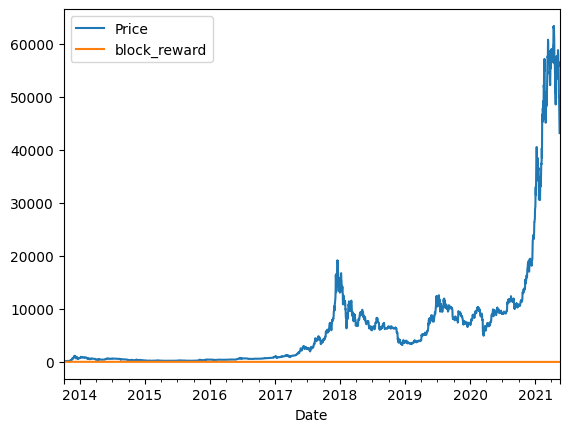

In [100]:
bitcoin_prices_block.plot()

<Axes: xlabel='Date'>

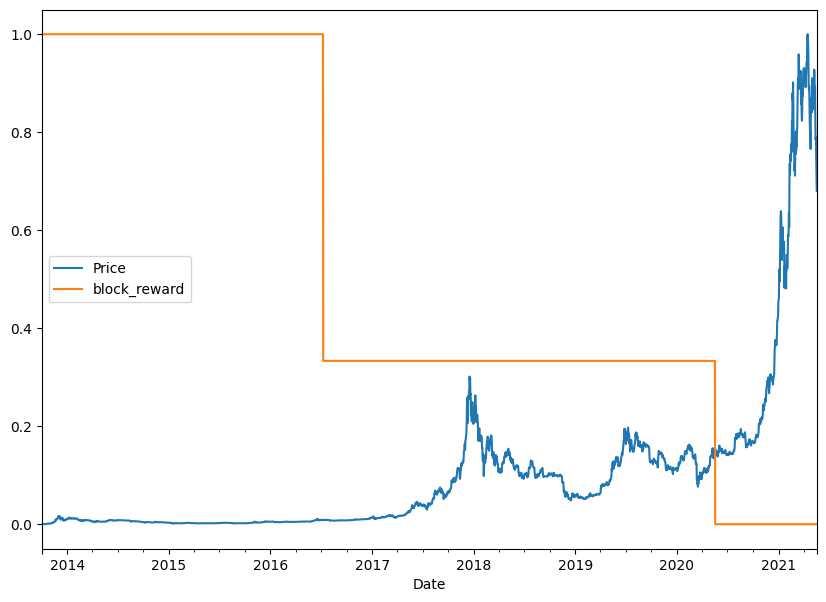

In [101]:
from sklearn.preprocessing import minmax_scale
scaled_prices_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                                                      columns=bitcoin_prices_block.columns,
                                                                      index=bitcoin_prices_block.index)

scaled_prices_block_df.plot(figsize=(10,7))

In [102]:
HORIZON=1
WINDOW_SIZE=7

In [103]:
bitcoin_prices_windowed=bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i+1}"]=bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [104]:
x=bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
x.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [105]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [106]:
split_size=int(len(x)*0.8)
x_train,y_train=x[:split_size],y[:split_size]
x_test,y_test=x[split_size:],y[split_size:]

len(x_train),len(x_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

# model 6

In [107]:
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON)
],name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(x_train,y_train,
            epochs=100,batch_size=128,
            validation_data=(x_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2604.3994INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 32ms/step - loss: 2604.3994 - val_loss: 3654.5239
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 402.8756INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 372.6449 - val_loss: 1491.9525
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 230.5336INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 224.0578 - val_loss: 1076.5304
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 221.0842INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 182.5065 - val_loss: 983.9545
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 176.3510 - val_loss: 1026.2617
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 169.4016INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 169.2625 - val_loss: 923.2628
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 168.5245INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 163.5098 - val_loss: 919.0122
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 161.0232INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 161.1034 - val_loss: 887.7017
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 158.9064 - val_loss: 900.8704
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 154.1561INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 26ms/step - loss: 155.9516 - val_loss: 853.8981
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 151.4140INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 152.8987 - val_loss: 844.1648
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 149.5012 - val_loss: 872.7672
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 149.1402 - val_loss: 856.2695
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 146.0569 - val_loss: 869.4388
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 145.5203INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 145.5203 - val_loss: 811.1323
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 141.6401 - val_loss: 812.8834
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 140.3329 - val_loss: 812.4387
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 141.5407INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 141.5407 - val_loss: 794.5042
Epoch 19/100
16/18 [=========================>....] - ETA: 0s - loss: 136.0353INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 135.8268 - val_loss: 772.8179
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 134.5811INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 133.7013 - val_loss: 740.4045
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 136.8568 - val_loss: 750.5154
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 132.4824 - val_loss: 750.9598
Epoch 23/100
16/18 [=========================>....] - ETA: 0s - loss: 132.1650INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 133.2922 - val_loss: 733.0783
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 133.7835INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 132.1292 - val_loss: 708.4719
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 135.3585INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 129.5172 - val_loss: 705.3144
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 129.6828INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 129.6828 - val_loss: 701.3922
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 130.4801INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 129.6186 - val_loss: 688.9860
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 126.8921 - val_loss: 691.1239
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 129.8637 - val_loss: 764.5776
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 134.5699 - val_loss: 787.0347
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 139.0150 - val_loss: 903.7441
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 137.1089 - val_loss: 770.6371
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 129.2794 - val_loss: 720.7222
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 127.4357INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 25ms/step - loss: 127.4357 - val_loss: 672.0146
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 126.6810INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 26ms/step - loss: 126.6019 - val_loss: 671.2026
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 129.2391 - val_loss: 763.5821
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 124.2843INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 26ms/step - loss: 124.2843 - val_loss: 645.4020
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 120.3885INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 28ms/step - loss: 120.3885 - val_loss: 642.0232
Epoch 39/100
15/18 [========================>.....] - ETA: 0s - loss: 122.3080INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 28ms/step - loss: 119.2413 - val_loss: 638.7640
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 118.3277INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 28ms/step - loss: 118.3293 - val_loss: 636.7054
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 120.2566INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 29ms/step - loss: 119.3372 - val_loss: 634.7173
Epoch 42/100
17/18 [===========================>..] - ETA: 0s - loss: 123.6691INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 28ms/step - loss: 122.4990 - val_loss: 631.9533
Epoch 43/100
13/18 [====================>.........] - ETA: 0s - loss: 112.9790INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 28ms/step - loss: 117.9195 - val_loss: 628.4244
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 118.7589 - val_loss: 635.6083
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 119.6006 - val_loss: 636.5307
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 117.4864INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 118.0507 - val_loss: 626.3751
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 118.9523 - val_loss: 719.6318
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 116.4054 - val_loss: 631.2576
Epoch 49/100
16/18 [=========================>....] - ETA: 0s - loss: 116.5183INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 27ms/step - loss: 116.3628 - val_loss: 617.9258
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 116.7350 - val_loss: 618.7059
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 115.7202INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 27ms/step - loss: 115.2189 - val_loss: 616.9682
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 116.0879 - val_loss: 630.2949
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 118.5768 - val_loss: 637.8348
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 119.7099 - val_loss: 695.9213
Epoch 55/100
16/18 [=========================>....] - ETA: 0s - loss: 120.0448INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 29ms/step - loss: 116.4011 - val_loss: 610.4470
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6357 - val_loss: 753.1750
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 120.5809 - val_loss: 654.4727
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 121.6229 - val_loss: 631.6277
Epoch 59/100
16/18 [=========================>....] - ETA: 0s - loss: 118.0880INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 34ms/step - loss: 118.4657 - val_loss: 596.6346
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 113.8992 - val_loss: 604.5505
Epoch 61/100
16/18 [=========================>....] - ETA: 0s - loss: 114.0697INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 113.3560 - val_loss: 595.7770
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 111.4442 - val_loss: 599.7216
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 113.8700 - val_loss: 626.4100
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 112.6799 - val_loss: 605.5114
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 114.6828 - val_loss: 600.6117
Epoch 66/100
14/18 [======================>.......] - ETA: 0s - loss: 111.6355INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 111.9882 - val_loss: 593.9412
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 111.7569 - val_loss: 714.1703
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 119.4269 - val_loss: 759.7966
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 134.8336 - val_loss: 702.2482
Epoch 70/100
14/18 [======================>.......] - ETA: 0s - loss: 133.3464INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 131.3866 - val_loss: 586.2025
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 114.8464 - val_loss: 598.1846
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 110.9036 - val_loss: 587.0814
Epoch 73/100
18/18 [==============================] - 0s 8ms/step - loss: 113.9661 - val_loss: 640.7316
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8787 - val_loss: 598.3715
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 111.3423 - val_loss: 587.0168
Epoch 76/100
13/18 [====================>.........] - ETA: 0s - loss: 112.8369INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 112.0620 - val_loss: 583.2385
Epoch 77/100
11/18 [=================>............] - ETA: 0s - loss: 115.4355INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 110.7646 - val_loss: 580.9224
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 110.6111 - val_loss: 594.2310
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 111.3636 - val_loss: 600.0798
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 110.3992 - val_loss: 596.6112
Epoch 81/100
14/18 [======================>.......] - ETA: 0s - loss: 109.3870INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 110.5695 - val_loss: 577.9088
Epoch 82/100
12/18 [===================>..........] - ETA: 0s - loss: 120.5807INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 119.1269 - val_loss: 577.3574
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 116.5936 - val_loss: 656.0426
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 114.6463 - val_loss: 588.5642
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 109.4848 - val_loss: 603.5812
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 111.6475 - val_loss: 606.0156
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 108.7147 - val_loss: 640.6786
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2739 - val_loss: 580.7581
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 108.3677 - val_loss: 578.5532
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 108.8875 - val_loss: 607.5492
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 107.5940 - val_loss: 572.7122
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 115.7738 - val_loss: 720.1699
Epoch 97/100
18/18 [==============================] - 0s 8ms/step - loss: 113.4602 - val_loss: 618.4036
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 112.2084 - val_loss: 604.7591
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 109.3658 - val_loss: 585.4024
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5817 - val_loss: 698.9141


In [108]:
model_6.evaluate(x_test,y_test)

18/18 [==============================] - 0s 4ms/step - loss: 698.9141


698.9140625

In [109]:
model_6=tf.keras.models.load_model("model_experiment_for_time_series_forecast/model_6_dense_multivariate/")
model_6.evaluate(x_test,y_test)

18/18 [==============================] - 0s 4ms/step - loss: 572.7122


572.712158203125

In [110]:
model_6_preds=tf.squeeze(model_6.predict(x_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8913.528, 8787.965, 9009.358, 8840.992, 8744.365, 8730.244,
       8719.605, 8547.522, 8467.96 , 8533.145], dtype=float32)>

In [111]:
model_6_results=evaluate_preds(y_test,
                               model_6_preds)
model_6_results

{'mse': 1195726.1,
 'mae': 572.7122,
 'rmse': 1093.4927,
 'mape': 2.5773273,
 'mase': 1.0060967}

In [112]:
model_1_results

{'mse': 1161420.4,
 'mae': 566.25275,
 'rmse': 1077.6921,
 'mape': 2.5309575,
 'mase': 0.99474925}

In [113]:
naive_results

{'mse': 1147547.0,
 'mae': 567.9802,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# building N-Beats layers

In [114]:
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,input_size:int,theta_size:int,horizon:int,n_neurons:int,n_layers:int,**kwargs):
        
        super().__init__(**kwargs)
        self.input_size=input_size
        self.theta_size=theta_size
        self.horizon=horizon
        self.n_neurons=n_neurons
        self.n_layers=n_layers
        
        self.hidden=[tf.keras.layers.Dense(n_neurons,activation='relu') for _ in range(n_layers)]
        
        self.theta_layer=tf.keras.layers.Dense(theta_size,activation='linear',name="theta")
        
    def call(self,inputs):
        x=inputs
        for layer in self.hidden:
            x=layer(x)
        theta=self.theta_layer(x)
        backcast,forecast=theta[:,:self.input_size],theta[:,-self.horizon:]
        
        return backcast,forecast

In [115]:
dummy_nbeats_block_layer=NBeatsBlock(input_size=WINDOW_SIZE,
                                     theta_size=WINDOW_SIZE+HORIZON,
                                     horizon=HORIZON,
                                     n_layers=4,
                                     n_neurons=128)

In [116]:
dummy_inputs=tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [117]:
backcast,forecast=dummy_nbeats_block_layer(dummy_inputs)

print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.08605066 -0.9009299   0.21191312 -0.13286853 -1.2535577   0.6302206
  0.46220213]
forecast: -0.21742001175880432


In [118]:
bitcoin_prices_nbeats=bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [119]:
x=bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y=bitcoin_prices_nbeats.dropna()["Price"]

split_size=int(len(x)*0.8)
x_train, y_train = x[:split_size],y[:split_size]
x_test, y_test = x[split_size:], y[split_size:]

len(x_train),len(y_train),len(x_test), len(y_test)

(2224, 2224, 556, 556)

In [120]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, None), dtype=tf.float64, name=None))>)

In [121]:
N_EPOCHS=1000
N_NEURONS=512
N_LAYERS=4
N_STACKS = 30
HORIZON=1
WINDOW_SIZE=7
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE 

INPUT_SIZE, THETA_SIZE

(7, 7)

In [122]:
# Checking add and subtract layer in tensorflow
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [172]:
# %%time

# tf.random.set_seed(42)

# nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
#                                  theta_size=THETA_SIZE,
#                                  horizon=HORIZON,
#                                  n_neurons=N_NEURONS,
#                                  n_layers=N_LAYERS,
#                                  name="InitialBlock")

# stack_input = layers.Input(shape=(INPUT_SIZE),name="stack_input")

# backcast, forecast = nbeats_block_layer(stack_input)

# residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# for i, _ in enumerate(range(N_STACKS-1)):
    
#     backcast, block_forecast = NBeatsBlock(
#         input_size=INPUT_SIZE,
#         theta_size=THETA_SIZE,
#         horizon=HORIZON,
#         n_neurons=N_NEURONS,
#         n_layers=N_LAYERS,
#         name=f"NBeatsBlock_{i}"
#     )(residuals)
    
#     residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
#     forecast = layers.add([forecast, block_forecast], name=f"add_{i}")
    
# model_7 = tf.keras.Model(stack_input, forecast, name="model_7_NBEATS")

# model_7.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam())

# model_7.fit(x_train,y_train,
#             epochs=N_EPOCHS,
#             validation_data=(x_test,y_test),
#             verbose=0,
#             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                         patience=200,
#                                                         restore_best_weights=True),
#                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
#                                                            patience=100,
#                                                            verbose=1)])


Epoch 184: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 284: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: total: 3min 35s
Wall time: 12min 14s


In [173]:
# model_7.evaluate(x_test,y_test)

18/18 [==============================] - 0s 20ms/step - loss: 561.2484


561.2483520507812

In [176]:
# model_7_preds=make_preds(model_7,x_test)
# model_7_preds[:10]

18/18 [==============================] - 0s 18ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8808.747 , 8784.533 , 9058.084 , 8734.671 , 8707.709 , 8758.102 ,
       8684.0205, 8515.046 , 8450.578 , 8555.979 ], dtype=float32)>

In [177]:
# model_7_results = evaluate_preds(y_test,model_7_preds)
# model_7_results

{'mse': 1141494.8,
 'mae': 561.2483,
 'rmse': 1068.4076,
 'mape': 2.5159976,
 'mase': 0.9859578}

In [178]:
model_1_results

{'mse': 1167094.2,
 'mae': 567.2641,
 'rmse': 1080.3213,
 'mape': 2.5574155,
 'mase': 0.9965259}

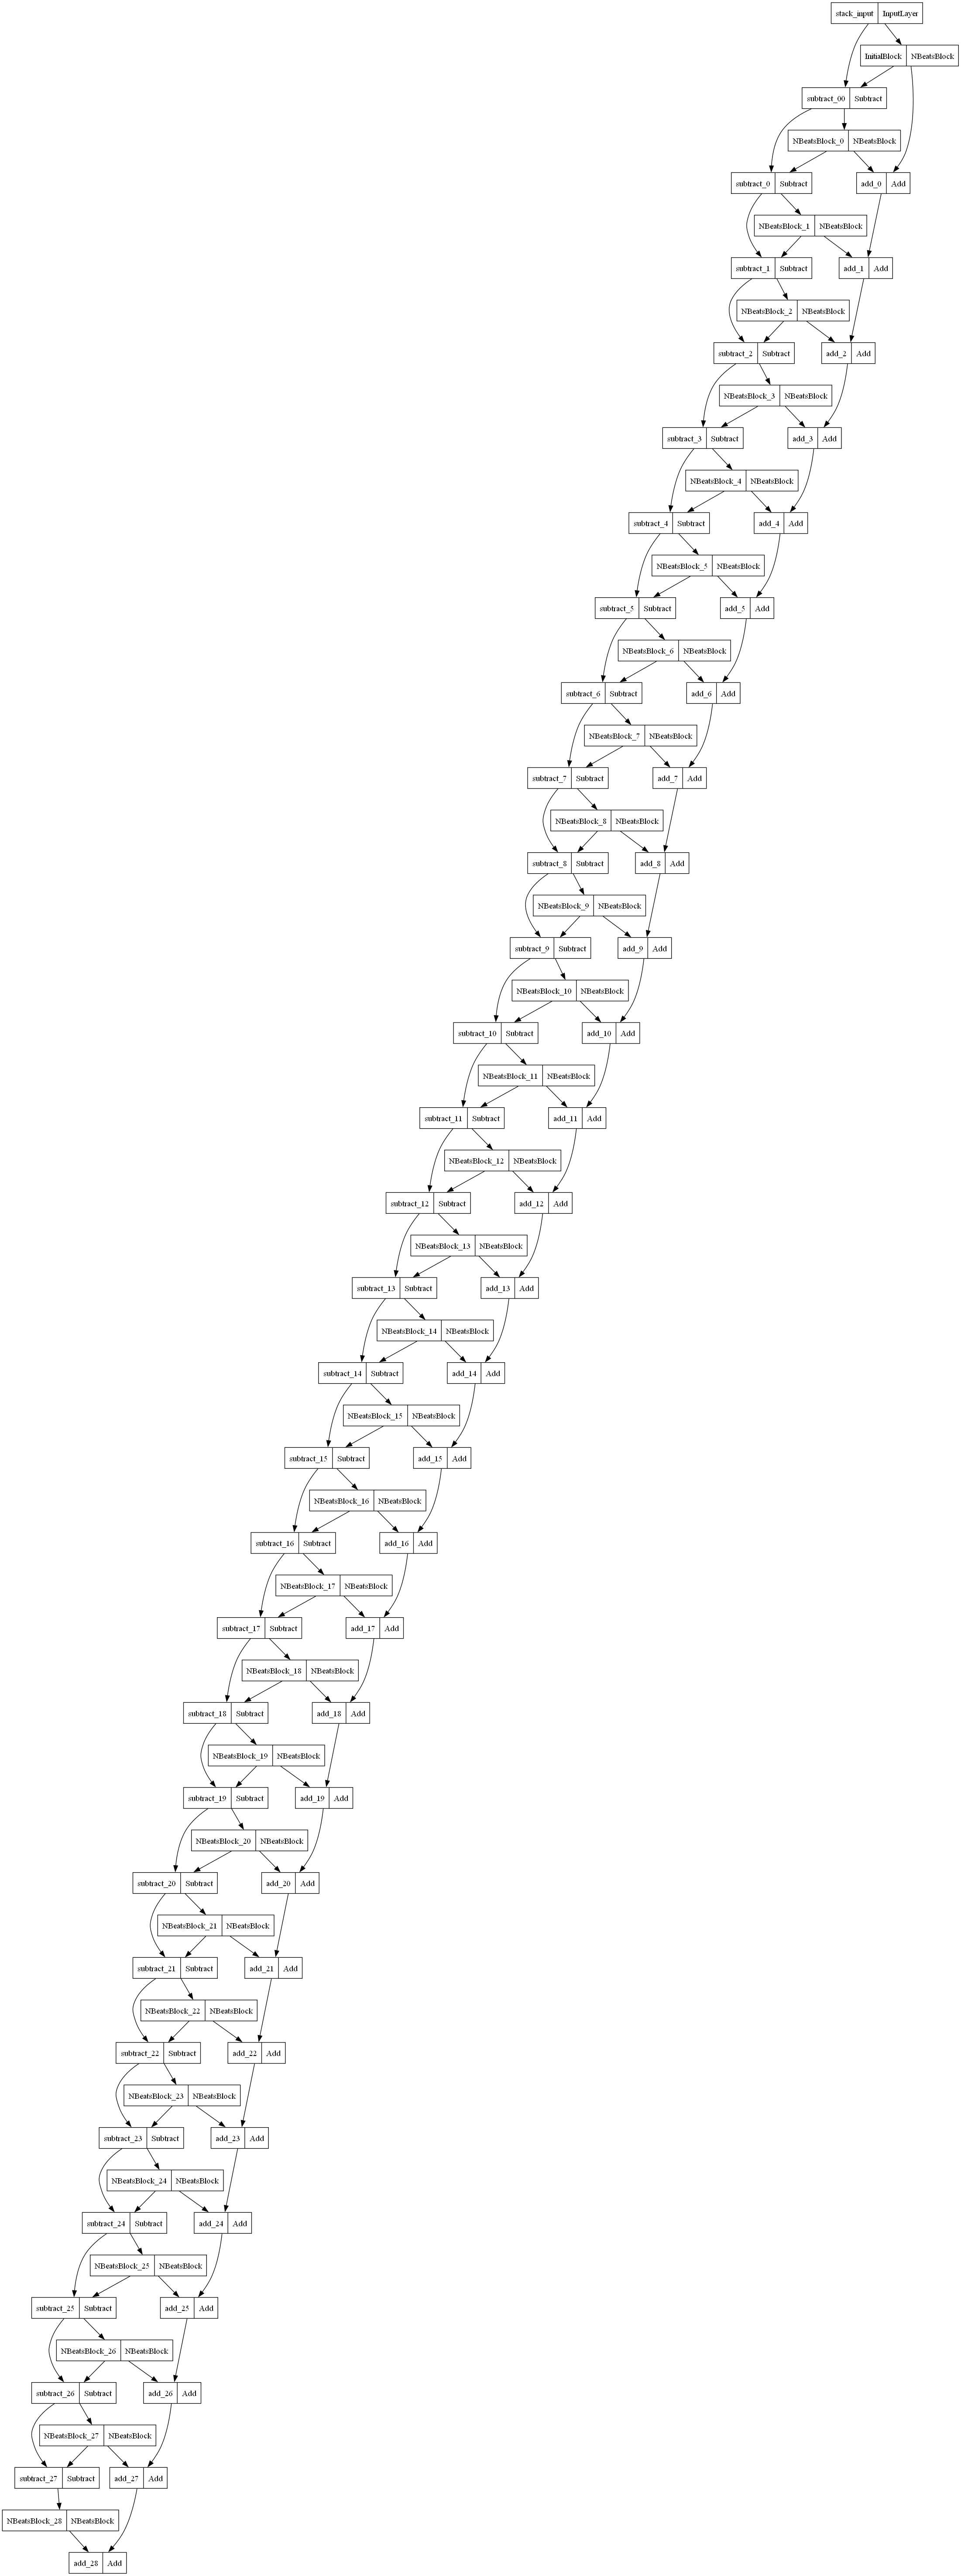

In [179]:
# from tensorflow.keras.utils import plot_model
# plot_model(model_7)

# model 8: ensemble

In [123]:
HORIZON,WINDOW_SIZE

(1, 7)

In [132]:
def get_ensemble_models(horizon=HORIZON,
                        x_trian=x_train,
                        y_train=y_train,
                        x_test=x_test,
                        y_test=y_test,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):
    
    ensemble_models=[]
    
    for i in range(num_iter):
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")
            
            model = tf.keras.Sequential([
                layers.Dense(128, kernel_initializer=tf.keras.initializers.he_normal, activation="relu"),
                layers.Dense(128, kernel_initializer="he_normal", activation='relu'),
                layers.Dense(HORIZON)
            ])
            
            model.compile(loss=loss_function,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae","mse"])
            
            model.fit(x_train,y_train,epochs=num_epochs,
                      verbose=0,validation_data=(x_test,y_test),
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                  patience=200,
                                                                  restore_best_weights=True),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                      patience=100,
                                                                      verbose=1)])
            
            ensemble_models.append(model)
            
    return ensemble_models

In [133]:
# %%time

# ensemble_models = get_ensemble_models(num_iter=5,
#                                       num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 307: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 407: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 186: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 286: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 176: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 276: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 128: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 228: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 220: ReduceLROnPl

In [134]:
# len(ensemble_models)

15

In [135]:
# ensemble_models

In [136]:
# def make_ensemble_preds(ensemble_models,data):
#     ensemble_preds = []
#     for model in ensemble_models:
#         preds = model.predict(data)
#         ensemble_preds.append(preds)
#     return tf.constant(tf.squeeze(ensemble_preds))

In [137]:
# %%time
# ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
#                                      data=x_test)
# ensemble_preds

18/18 [==============================] - 0s 2ms/step
CPU times: total: 766 ms
Wall time: 2.57 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8764.761 ,  8728.858 ,  9036.802 , ..., 49836.184 , 48526.19  ,
        46253.707 ],
       [ 8758.416 ,  8752.455 ,  9094.264 , ..., 49700.387 , 48467.39  ,
        46167.51  ],
       [ 8771.61  ,  8749.065 ,  9021.991 , ..., 50042.15  , 48461.113 ,
        45883.973 ],
       ...,
       [ 8747.6455,  8711.593 ,  9078.598 , ..., 49920.395 , 48690.434 ,
        46813.098 ],
       [ 8702.127 ,  8672.661 ,  9020.803 , ..., 49679.8   , 48018.797 ,
        46173.004 ],
       [ 8774.474 ,  8734.819 ,  9039.018 , ..., 49899.586 , 48415.6   ,
        46569.043 ]], dtype=float32)>

In [138]:
y_test

Date
2019-11-10     8798.042055
2019-11-11     9081.186878
2019-11-12     8711.534339
2019-11-13     8760.892718
2019-11-14     8749.520591
                  ...     
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: Price, Length: 556, dtype: float64

In [139]:
# ensemble_results = evaluate_preds(y_true=y_test,
#                                   y_pred=ensemble_preds)
# ensemble_results

{'mse': 1153819.1,
 'mae': 571.03296,
 'rmse': 1074.1367,
 'mape': 2.593053,
 'mase': 1.0031468}

In [140]:
model_1_results

{'mse': 1161420.4,
 'mae': 566.25275,
 'rmse': 1077.6921,
 'mape': 2.5309575,
 'mase': 0.99474925}

In [142]:
# ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
# ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8762.45  ,  8745.003 ,  9057.542 ,  8722.113 ,  8731.337 ,
        8717.555 ,  8637.636 ,  8498.198 ,  8421.27  ,  8522.126 ,
        8196.661 ,  8079.2476,  8037.591 ,  7609.164 ,  7265.9556,
        7263.631 ,  7063.2407,  7197.0303,  7113.0625,  7495.6763,
        7431.7   ,  7716.3057,  7598.898 ,  7359.865 ,  7332.4746,
        7281.7266,  7215.6167,  7375.201 ,  7517.485 ,  7547.244 ,
        7562.7817,  7324.591 ,  7216.1426,  7176.507 ,  7170.9624,
        7231.3115,  7071.205 ,  7087.6733,  6867.5493,  6558.4556,
        7384.694 ,  7194.1597,  7145.5347,  7283.9277,  7223.2505,
        7217.0264,  7212.3955,  7210.08  ,  7185.3486,  7219.344 ,
        7309.28  ,  7400.9487,  7257.2925,  7161.312 ,  7157.934 ,
        6940.87  ,  7271.5146,  7353.037 ,  7356.863 ,  7729.2085,
        8067.887 ,  8154.532 ,  7849.839 ,  8065.9487,  8120.5024,
        8174.848 ,  8131.9365,  8721.516 ,  8935.206 ,  8758.594 ,
        8941.6

In [143]:
# ensemble_median = np.median(ensemble_preds, axis=0)
# ensemble_median

array([ 8765.821 ,  8749.065 ,  9060.852 ,  8727.259 ,  8724.783 ,
        8709.529 ,  8644.226 ,  8498.809 ,  8422.8955,  8530.348 ,
        8197.419 ,  8076.7705,  8042.4966,  7611.782 ,  7273.8433,
        7274.667 ,  7061.7827,  7192.643 ,  7113.318 ,  7486.4126,
        7427.041 ,  7720.27  ,  7603.2305,  7366.3823,  7341.714 ,
        7284.8184,  7213.4233,  7373.183 ,  7510.152 ,  7543.578 ,
        7556.266 ,  7326.0957,  7216.6143,  7182.031 ,  7174.8096,
        7231.2354,  7069.574 ,  7089.258 ,  6872.574 ,  6565.1836,
        7376.235 ,  7190.7925,  7149.7314,  7282.3867,  7221.8394,
        7210.155 ,  7208.839 ,  7208.862 ,  7187.7144,  7216.036 ,
        7304.6826,  7399.2827,  7254.545 ,  7162.073 ,  7163.2227,
        6948.7583,  7272.336 ,  7345.399 ,  7353.6094,  7716.786 ,
        8065.5674,  8155.1274,  7848.196 ,  8070.1665,  8121.7607,
        8178.457 ,  8127.5967,  8720.428 ,  8932.62  ,  8763.136 ,
        8941.135 ,  8945.628 ,  8674.428 ,  8627.231 ,  8683.3

In [144]:
# ensemble_result_mean = evaluate_preds(y_test,ensemble_mean)
# ensemble_result_mean

{'mse': 1139384.0,
 'mae': 565.5299,
 'rmse': 1067.4193,
 'mape': 2.5644083,
 'mase': 0.99347943}

In [145]:
# ensemble_results

{'mse': 1153819.1,
 'mae': 571.03296,
 'rmse': 1074.1367,
 'mape': 2.593053,
 'mase': 1.0031468}

In [146]:
# ensemble_result_median =  evaluate_preds(y_test,ensemble_median)
# ensemble_result_median

{'mse': 1138920.0,
 'mae': 565.7276,
 'rmse': 1067.2019,
 'mape': 2.562777,
 'mase': 0.9938267}

In [148]:
# tf.math.reduce_std(ensemble_preds,axis=0)

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 29.046213 ,  36.050148 ,  26.28006  ,  30.19355  ,  29.86647  ,
        27.240557 ,  24.823067 ,  25.167034 ,  26.4592   ,  19.315039 ,
        23.047901 ,  26.028494 ,  24.308784 ,  28.957586 ,  44.92286  ,
        31.718842 ,  30.457628 ,  37.702374 ,  32.63311  ,  34.31275  ,
        25.46534  ,  27.359804 ,  21.364521 ,  25.57213  ,  21.949503 ,
        20.261305 ,  21.22251  ,  23.008812 ,  22.917925 ,  20.040508 ,
        17.037445 ,  13.955574 ,  23.115454 ,  19.972933 ,  21.742903 ,
        20.203077 ,  23.963787 ,  17.735798 ,  19.139357 ,  27.034214 ,
        34.778706 ,  30.923265 ,  34.215363 ,  32.79013  ,  18.985708 ,
        25.971716 ,  19.95182  ,  12.13732  ,  13.236539 ,  15.323856 ,
        15.864786 ,  15.459595 ,  14.400648 ,  15.038304 ,  14.547787 ,
        21.201633 ,  22.639065 ,  24.184048 ,  23.107218 ,  27.413082 ,
        24.711224 ,  21.291517 ,  17.895845 ,  21.227983 ,  19.138489 ,
        18.60417

In [149]:
def  get_upper_lower(preds):
    
    std = tf.math.reduce_std(preds,axis=0)
    interval = 1.96*std
    preds_mean = tf.reduce_mean(preds,axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    return lower, upper

In [150]:
# lower, upper = get_upper_lower(ensemble_preds)
# lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8705.52  ,  8674.345 ,  9006.033 ,  8662.934 ,  8672.799 ,
         8664.163 ,  8588.982 ,  8448.871 ,  8369.409 ,  8484.269 ,
         8151.4873,  8028.232 ,  7989.946 ,  7552.407 ,  7177.9067,
         7201.462 ,  7003.544 ,  7123.134 ,  7049.1016,  7428.4233,
         7381.788 ,  7662.6807,  7557.0234,  7309.7437,  7289.4536,
         7242.0146,  7174.0205,  7330.104 ,  7472.566 ,  7507.965 ,
         7529.388 ,  7297.238 ,  7170.8364,  7137.36  ,  7128.346 ,
         7191.7134,  7024.236 ,  7052.911 ,  6830.036 ,  6505.4688,
         7316.5273,  7133.5503,  7078.4727,  7219.659 ,  7186.0386,
         7166.1216,  7173.29  ,  7186.291 ,  7159.405 ,  7189.3096,
         7278.1846,  7370.648 ,  7229.0674,  7131.837 ,  7129.4204,
         6899.315 ,  7227.142 ,  7305.636 ,  7311.5728,  7675.479 ,
         8019.453 ,  8112.801 ,  7814.763 ,  8024.342 ,  8082.991 ,
         8138.384 ,  8095.632 ,  8664.461 ,  8881.11  ,  8707.601 ,

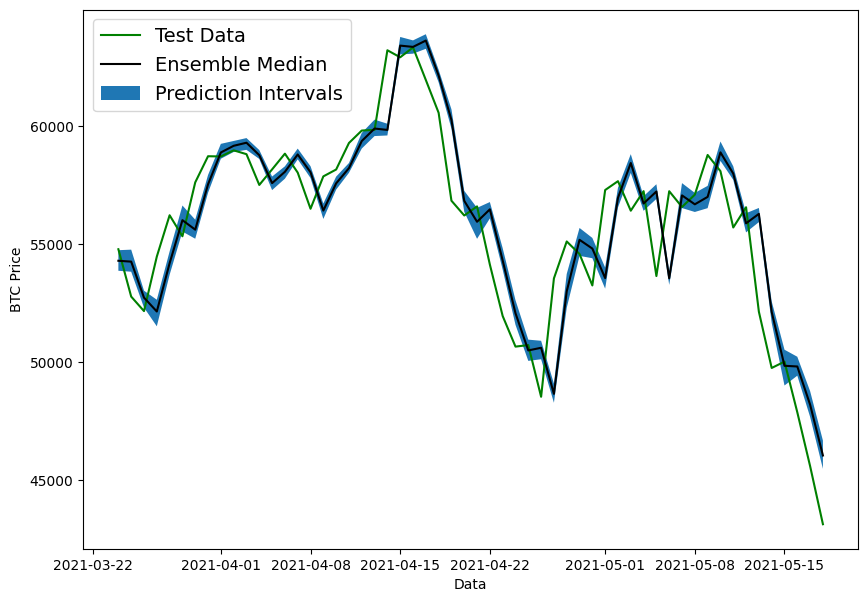

In [167]:
# offset = 500
# plt.figure(figsize=(10,7))
# plt.plot(x_test.index[offset:],y_test[offset:],"g",label="Test Data")
# plt.plot(x_test.index[offset:],ensemble_median[offset:],"k-",label="Ensemble Median")
# plt.xlabel("Data")
# plt.ylabel("BTC Price")
# plt.fill_between(x_test.index[offset:],
#                  (lower)[offset:],
#                  (upper)[offset:], label="Prediction Intervals")
# plt.legend(loc="upper left", fontsize=14);

In [165]:
x_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [166]:
y_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

# model 9: train on historical data and predict future

In [168]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [169]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [171]:
x_all = bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(x_all), len(y_all)

(2780, 2780)

In [172]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [173]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
],name="model_9_future_model")

model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [174]:
INTO_FUTURE = 14

In [175]:
y_all[-WINDOW_SIZE:]

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [182]:
def make_future_forecast(values,model, into_future, window_size=WINDOW_SIZE) -> list:
    
    future_forecast = []
    last_window = values[-window_size:]
    
    for _ in range(into_future):
        future_preds = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_preds).numpy()}\n")
        
        future_forecast.append(tf.squeeze(future_preds).numpy())
        
        last_window = np.append(last_window, future_preds)[-window_size:]
    return future_forecast

In [184]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 17ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55220.51953125

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55220.51953125] -> Prediction: 50708.578125

1/1 [==============================] - 0s 21ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55220.51953125 50708.578125  ] -> Prediction: 50057.8359375

1/1 [==============================] - 0s 30ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55220.51953125 50708.578125   50057.8359375 ] -> Prediction: 48495.5546875

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55220.51953125
 50708.578125   50057.8359375  48495.5546875 ] 

In [185]:
future_forecast

[55220.52,
 50708.58,
 50057.836,
 48495.555,
 45766.617,
 45319.92,
 48621.15,
 53616.3,
 50285.12,
 49031.117,
 46508.348,
 45170.438,
 47263.004,
 51109.06]

In [186]:
def get_future_dates(start_date, into_future, offset=1):
    
    start_date = start_date + np.timedelta64(offset, "D")
    end_date = start_date + np.timedelta64(into_future, "D")
    return np.arange(start_date, end_date, dtype="datetime64[D]")

In [187]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [188]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [190]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

next_time_steps,future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55220.52 , 50708.58 , 50057.836, 48495.555, 45766.617,
        45319.92 , 48621.15 , 53616.3  , 50285.12 , 49031.117, 46508.348,
        45170.438, 47263.004, 51109.06 ], dtype=float32))

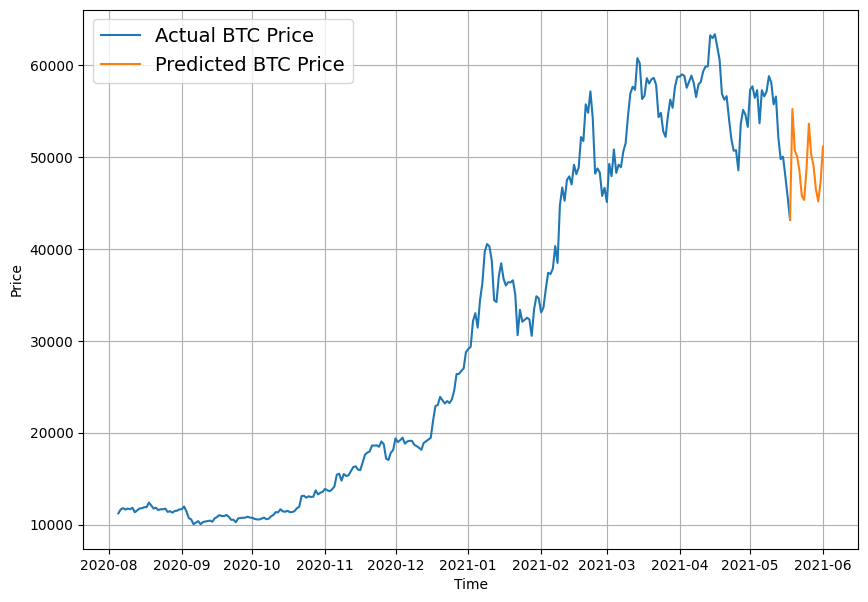

In [191]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps,future_forecast, format="-", label="Predicted BTC Price")

# model 10: why forecast is black swan(the turkey problen)

In [196]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [197]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [198]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

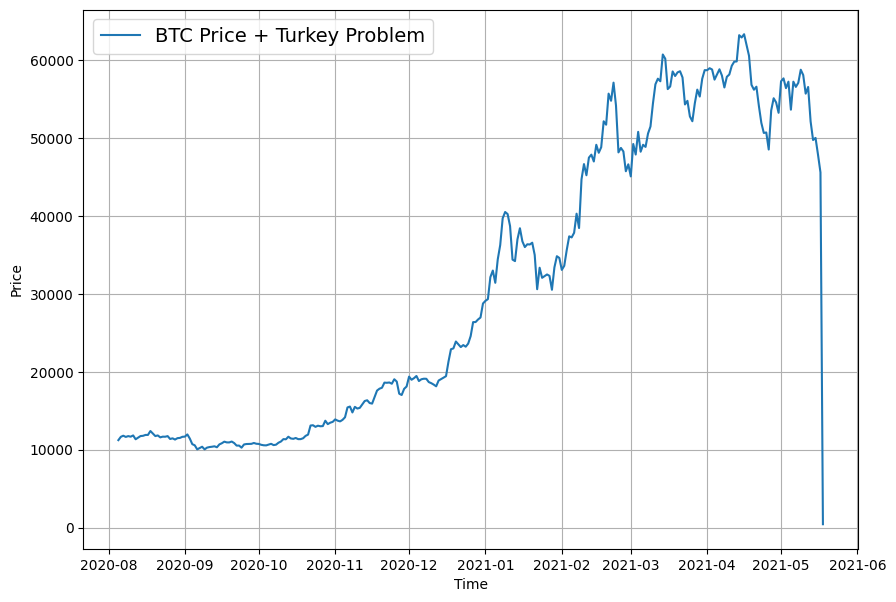

In [199]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [200]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
x_train, x_test, y_train,y_test = make_train_test_splits(full_windows, full_labels)

len(x_train), len(x_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [202]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(x_train,y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(x_test,y_test),
                 callbacks=[create_model_checkpoint(model_name=turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiment_for_time_series_forecast\model_10_turkey_model\assets


In [203]:
turkey_model.evaluate(x_test,y_test)

18/18 [==============================] - 0s 3ms/step - loss: 650.0762


650.0762329101562

In [204]:
turkey_model = tf.keras.models.load_model("model_experiment_for_time_series_forecast/model_10_turkey_model/")
turkey_model.evaluate(x_test,y_test)

18/18 [==============================] - 0s 3ms/step - loss: 644.1295


644.1295166015625

In [206]:
turkey_preds = make_preds(turkey_model, x_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8841.668, 8766.168, 9045.497, 8762.867, 8736.776, 8758.189,
       8678.121, 8503.301, 8467.177, 8529.159], dtype=float32)>

In [207]:
turkey_results = evaluate_preds(y_test, turkey_preds)
turkey_results

{'mse': 615279700.0,
 'mae': 17141.033,
 'rmse': 23737.184,
 'mape': 121.5239,
 'mase': 26.525805}

In [208]:
model_1_results

{'mse': 1161420.4,
 'mae': 566.25275,
 'rmse': 1077.6921,
 'mape': 2.5309575,
 'mase': 0.99474925}

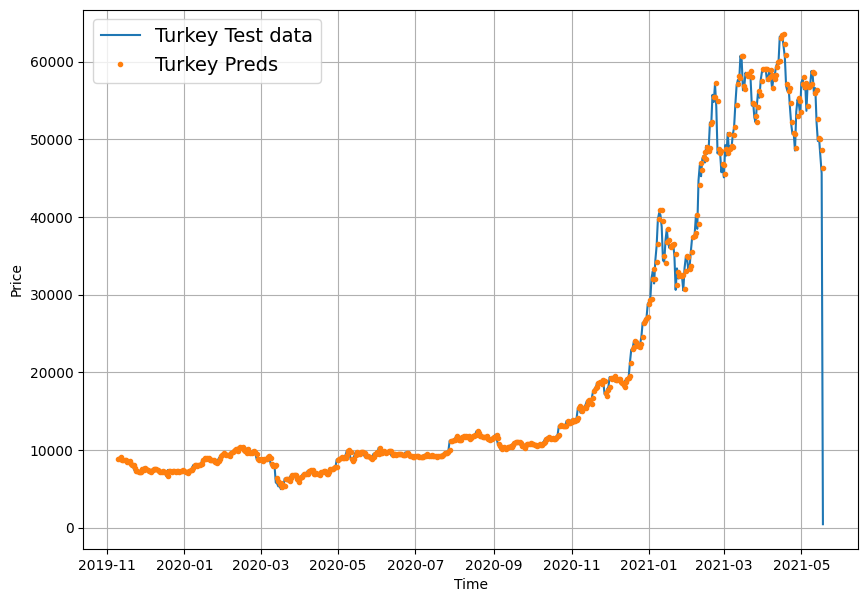

In [211]:
plt.figure(figsize=(10,7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(x_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test data",start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(x_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

In [212]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_conv1d": model_4_results,
                              "model_5_lstm": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results

,mse,mae,rmse,mape,mase
naive_model,1.147547e+06,567.980225,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,1.161420e+06,566.252747,1077.692139,2.530957,0.994749
model_2_dense_w30_h1,1.359804e+06,625.711365,1166.106445,2.815790,1.093750
model_3_dense_w30_h7,5.483799e+06,1244.671509,1431.174194,5.566384,2.214823
model_4_conv1d,1.220483e+06,579.125793,1104.754761,2.603715,1.017364
model_5_lstm,1.282688e+06,600.210205,1132.558105,2.702639,1.054403
model_6_multivariate,1.195726e+06,572.712219,1093.492676,2.577327,1.006097
model_8_ensemble,1.153819e+06,571.032959,1074.136719,2.593053,1.003147
model_10_turkey,6.152797e+08,17141.033203,23737.183594,121.523903,26.525805


<Axes: >

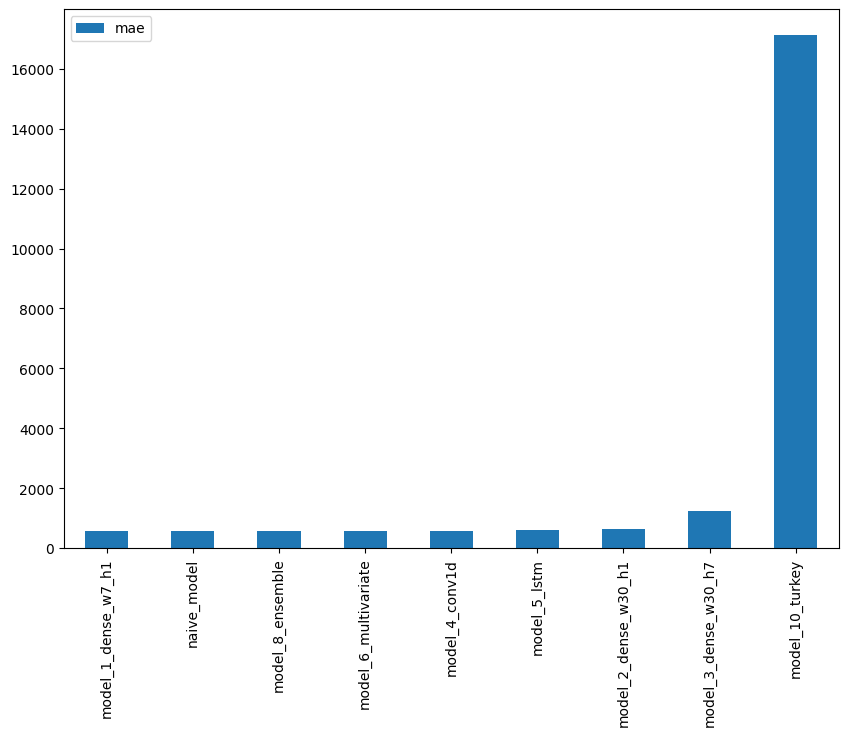

In [214]:
model_results[['mae']].sort_values(by='mae').plot(figsize=(10,7),kind='bar')